<a href="https://colab.research.google.com/github/DarekGit/detr/blob/master/WIDERFACE_Detectron2_DD_DeTr_R50_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detectron2 z DeTr z Resnet50 </br>
LR=1-4 </br>
Gamma=0.1 </br>
Scheduler [300000,400000] </br>
Max 500k </br>
CROP.ENABLED = False

# Doc
DeTr https://arxiv.org/pdf/2005.12872.pdf </br>
Detectron2  https://github.com/facebookresearch/detectron2 <br>
Detectron2 Beginner's Tutorial https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5 <br>
Documentation https://detectron2.readthedocs.io <br>



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
def Wider_load(val=True,train=True,test=False):
  os.makedirs('WIDER/', exist_ok=True)

  if val:
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDd3dIRmpvSk8tLUk
    !gdown https://drive.google.com/uc?id=1-5A_pa_jDS7gk8mHVCBB7ApV5KN8jWDr -O WIDER/tempv.zip
    !unzip -q WIDER/tempv.zip -d WIDER
    !rm WIDER/tempv.zip  

  if train:
    ### WIDER Face Training Images
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDQUUwd21EckhUbWs
    !gdown https://drive.google.com/uc?id=1-1iJfmXKYvAx9uLdRDX5W6HHG_KZv1jH -O WIDER/temptr.zip
    !unzip -q WIDER/temptr.zip -d WIDER
    !rm WIDER/temptr.zip
  
  if test:
    #!gdown https://drive.google.com/uc?id=0B6eKvaijfFUDbW4tdGpaYjgzZkU
    !gdown https://drive.google.com/uc?id=1tTpUJZEQMKDVxKT6100V5FwDuGX_8sDi -O WIDER/tempt.zip
    !unzip -q WIDER/tempt.zip -d WIDER
    !rm WIDER/tempt.zip


  ### Face annotations
  !wget mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip -O WIDER/tempa.zip
  !unzip -q WIDER/tempa.zip -d WIDER
  !rm WIDER/tempa.zip

  #annotations
  !gdown https://drive.google.com/uc?id=1_9ydMZlTNFXBOMl16xsU8FSBmK2PW4lN -O WIDER/tools.py


  ### Examples and formats of the submissions
  #!wget mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/example/Submission_example.zip


In [3]:
def repo_load():
  !pip install cython pyyaml==5.1
  !pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  # install detectron2:
  !git clone https://github.com/facebookresearch/detectron2 detectron2_repo
  !cd detectron2_repo && git reset a33fc53 --hard # v0.2
  !pip install -q -e detectron2_repo


repo_load()

     |████████████████████████████████| 276kB 9.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=5c3c3a459caf8b0e7bdd5deafcd210ee002bccde500970fe3f165fd857324948
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-laebrmnl
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-laebrmnl
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266461 sha256=7b4d044010f9056ee4201a558bacc360a8bddbb9568c034e31b15e2a02eff93a
  Stored in directory: /tmp/pip-ephem-wheel-cache-jnxyvb34/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing install

In [4]:
Wider_load()

Downloading...
From: https://drive.google.com/uc?id=1-5A_pa_jDS7gk8mHVCBB7ApV5KN8jWDr
To: /content/WIDER/tempv.zip
363MB [00:03, 97.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1iJfmXKYvAx9uLdRDX5W6HHG_KZv1jH
To: /content/WIDER/temptr.zip
1.47GB [00:15, 96.9MB/s]
--2020-12-06 08:45:44--  http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/support/bbx_annotation/wider_face_split.zip
Resolving mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)... 137.189.99.12
Connecting to mmlab.ie.cuhk.edu.hk (mmlab.ie.cuhk.edu.hk)|137.189.99.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3591642 (3.4M) [application/zip]
Saving to: ‘WIDER/tempa.zip’

WIDER/tempa.zip     100%[===================>]   3.42M  2.57MB/s    in 1.3s    

2020-12-06 08:45:46 (2.57 MB/s) - ‘WIDER/tempa.zip’ saved [3591642/3591642]

Downloading...
From: https://drive.google.com/uc?id=1_9ydMZlTNFXBOMl16xsU8FSBmK2PW4lN
To: /content/WIDER/tools.py
100% 4.47k/4.47k [00:00<00:00, 6.33MB/s]


In [5]:
!git clone https://github.com/DarekGit/detr.git  
#!git clone https://github.com/facebookresearch/detr.git

Cloning into 'detr'...
remote: Enumerating objects: 182, done.
remote: Total 182 (delta 0), reused 0 (delta 0), pack-reused 182
Receiving objects: 100% (182/182), 12.82 MiB | 45.11 MiB/s, done.
Resolving deltas: 100% (85/85), done.


<font color=red> Restart runtime to continue... <b>Crtl+M.</b> </font>

In [1]:
!nvidia-smi
from psutil import virtual_memory
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(virtual_memory().total / 1e9))

Sun Dec  6 08:55:49 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from google.colab import drive
import os
import cv2
import random
import itertools
import shutil
import glob
import json
import numpy as np
import pandas as pd
from PIL import ImageDraw, Image
from collections import defaultdict
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
import detectron2.utils.comm as comm
from detectron2.engine import DefaultPredictor, DefaultTrainer, HookBase
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_train_loader
from detectron2.structures import BoxMode
from detectron2.data import build_detection_test_loader
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

In [3]:
from WIDER.tools import annotations,output_Files
output_files=output_Files()

In [4]:
import sys
sys.path.append('/content/detr')
from d2.train_net import Trainer, setup
from d2.detr.config import add_detr_config

# Prepare the dataset

## WIDER FACE: A Face Detection Benchmark
http://shuoyang1213.me/WIDERFACE/ <br>

https://arxiv.org/pdf/1511.06523.pdf <br>


In [5]:
# img list  limited to images with upto 100 objects
train = [m for m in annotations("train") if len(m['annotations']) <100]
val = [m for m in annotations("val") if len(m['annotations']) <100]

In [6]:
for d in ["train", "val"]:
  DatasetCatalog.register("face_" + d, lambda d=d: train if d == "train" else val)
  MetadataCatalog.get("face_" + d).set(thing_classes = ['face'])

faces_metadata = MetadataCatalog.get("face_train")

In [40]:

import pandas as pd
hist=dict(); hists={}
for i in (range(len(train))):
  f=len(train[i]['annotations'])
  hist[f]= 1 +hist.get(f,0)

for k in sorted(hist):hists[k]=hist[k]

pd.DataFrame([*hists.items()], index=None, columns=['ilosc twarzy','ilosc obrazow'])

,ilosc twarzy,ilosc obrazow
0,1,4635
1,2,1793
2,3,827
3,4,680
4,5,504
...,...,...
94,95,3
95,96,4
96,97,5
97,98,3


In [8]:
len(train), len(val)

(12635, 3166)

# "detr_256_6_6_torchvision.yaml"
detr/configs


In [9]:
cfg = get_cfg()
add_detr_config(cfg)

cfg_file='detr_256_6_6_torchvision.yaml'
cfg.merge_from_file('detr/d2/configs/'+cfg_file)

cfg.MODEL.PIXEL_MEAN =(119.857,110.808,104.148)
#cfg.MODEL.PIXEL_STD =(77.168,74.631,75.842)
cfg.MODEL.PIXEL_STD =(0.6076259372440945, 0.5876417505511812, 0.5971849743307086)
cfg.INPUT.FORMAT='RGB'
cfg.MODEL.FORMAT='RGB'
#cfg.MODEL.SEM_SEG_HEAD.NUM_CLASSES=1
#cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class 
cfg.MODEL.DETR.NUM_CLASSES = 1
cfg.MODEL.DETR.NUM_OBJECT_QUERIES = 100 #max nb of objects

In [10]:
#pretrained model weights
!python detr/d2/converter.py --source_model https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth --output_model converted_model.pth >_

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/hub/checkpoints/detr-r50-e632da11.pth
100% 159M/159M [00:14<00:00, 11.7MB/s]


In [10]:
cfg.DATASETS.TRAIN = ("face_train",)
cfg.DATASETS.TEST = ("face_val",)
cfg.DATASETS.VAL = ("face_val",)
cfg.DATALOADER.NUM_WORKERS = 8

cfg.MODEL.RESNETS.DEPTH = 50
cfg.MODEL.BACKBONE.FREEZE_AT = 0
cfg.MODEL.WEIGHTS = "converted_model.pth" 
cfg.MODEL.RESNETS.NORM = 'BN' ##FrozeenBN

cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.BASE_LR = 0.0001  #  LR 1e-4
cfg.SOLVER.BACKBONE_MULTIPLIER = 1
cfg.SOLVER.MAX_ITER = 500000    

cfg.SOLVER.LR_SCHEDULER_NAME = "WarmupMultiStepLR"
cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.WARMUP_FACTOR = .01
cfg.SOLVER.STEPS =[300000,400000]
cfg.SOLVER.GAMMA = 0.1
cfg.SOLVER.CLIP_GRADIENTS.CLIP_VALUE = 0.1
cfg.SOLVER.CHECKPOINT_PERIOD = 10000
cfg.TEST.EVAL_PERIOD = 6440


cfg.INPUT.CROP.ENABLED = False
cfg.INPUT.MAX_SIZE_TEST = 2000
cfg.INPUT.MAX_SIZE_TRAIN = 2000
cfg.INPUT.MIN_SIZE_TRAIN = (512, 800, 1600)
cfg.INPUT.CROP.SIZE = (1600,2400)


In [11]:
drive.mount('/content/drive')

cfg.OUTPUT_DIR = os.path.join("./drive/My Drive/Face detection", "WIDER_DeTr_V2")
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
#cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR,'model_2199999.pth') ###

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
print(cfg.dump())


CUDNN_BENCHMARK: false
DATALOADER:
  ASPECT_RATIO_GROUPING: true
  FILTER_EMPTY_ANNOTATIONS: false
  NUM_WORKERS: 8
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: []
  PROPOSAL_FILES_TRAIN: []
  TEST:
  - face_val
  TRAIN:
  - face_train
  VAL:
  - face_val
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: false
    SIZE:
    - 1600
    - 2400
    TYPE: absolute_range
  FORMAT: RGB
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 2000
  MAX_SIZE_TRAIN: 2000
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN:
  - 512
  - 800
  - 1600
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES:
    - - -90
      - 0
      - 90
    ASPECT_RATIOS:
    - - 0.5
      - 1.0
      - 2.0
    NAME: DefaultAnchorGenerator
    OFFSET: 0.0
    SIZES:
    - - 32
      - 64
      - 128
      - 256
      - 512
  BACKBONE:
    FREEZE_AT: 0
    NAME: build_resnet_backbone
  DETR:
    DEC_LAYERS:

In [14]:
import json
cfg_all=cfg_file.split('.')[-2]+'_ALL.json'
cfg_all = os.path.join(cfg.OUTPUT_DIR, cfg_all)
with open(cfg_all,'w') as f:
  json.dump(cfg,f)


In [ ]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = Trainer(cfg) 

'''
val_loss = Validation_Loss(cfg)  
trainer.register_hooks([val_loss])
trainer._hooks = trainer._hooks[:-2] + trainer._hooks[-2:][::-1]
'''

trainer.resume_or_load(resume=True)
trainer.train()

**231 839 iterations**
```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.044
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.010
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.161
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.406
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.030
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.080
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.125
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.028
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.329
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.568
[12/04 13:54:44 d2.evaluation.coco_evaluation]: Evaluation results for bbox: 
|  AP   |  AP50  |  AP75  |  APs  |  APm   |  APl   |
|:-----:|:------:|:------:|:-----:|:------:|:------:|
| 6.677 | 16.076 | 4.442  | 0.952 | 16.069 | 40.595 |
```

**392 839 iterations**
```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.234
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.277
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.541
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.040
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.118
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.174
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.422
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.668
[12/05 15:06:11 d2.evaluation.coco_evaluation]: Evaluation results for bbox: 
|   AP   |  AP50  |  AP75  |  APs  |  APm   |  APl   |
|:------:|:------:|:------:|:-----:|:------:|:------:|
| 10.761 | 23.447 | 8.692  | 1.330 | 27.686 | 54.144 |

```

**431 479 iterations**
```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.121
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.254
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.101
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.303
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.552
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.043
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.128
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.188
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.456
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.681
[12/05 19:36:47 d2.evaluation.coco_evaluation]: Evaluation results for bbox: 
|   AP   |  AP50  |  AP75  |  APs  |  APm   |  APl   |
|:------:|:------:|:------:|:-----:|:------:|:------:|
| 12.084 | 25.430 | 10.089 | 1.769 | 30.310 | 55.197 |

```

**470 119 iterations**
```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.259
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.102
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.302
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.550
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.043
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.129
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.188
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.068
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.455
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.678
[12/06 00:10:33 d2.evaluation.coco_evaluation]: Evaluation results for bbox: 
|   AP   |  AP50  |  AP75  |  APs  |  APm   |  APl   |
|:------:|:------:|:------:|:-----:|:------:|:------:|
| 12.213 | 25.859 | 10.177 | 1.819 | 30.150 | 55.028 |

```

Użycie modelu

In [16]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0469999.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05   # set the testing threshold for this model
cfg.DATASETS.TEST = ("face_val", )
predictor = DefaultPredictor(cfg)

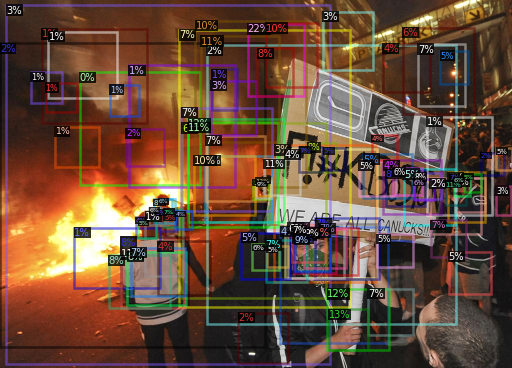

In [25]:
dataset_dicts = val
for d in random.sample(dataset_dicts, 1):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im,metadata=faces_metadata, scale=0.5)
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image())

AP metric on val

In [29]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

trainer =Trainer(cfg)
trainer.resume_or_load(resume=False)
evaluator = COCOEvaluator("face_val", cfg, False, output_dir="./Output/")
val_loader = build_detection_test_loader(cfg, "face_val")
inference_on_dataset(trainer.model, val_loader, evaluator)

[12/06 09:19:51 d2.data.common]: Serializing 3166 elements to byte tensors and concatenating them all ...
[12/06 09:19:51 d2.data.common]: Serialized dataset takes 2.28 MiB
[12/06 09:19:51 d2.data.dataset_mapper]: Augmentations used in training: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=2000, sample_style='choice')]
[12/06 09:19:51 d2.evaluation.evaluator]: Start inference on 3166 images
[12/06 09:19:52 d2.evaluation.evaluator]: Inference done 11/3166. 0.0599 s / img. ETA=0:03:13
[12/06 09:19:57 d2.evaluation.evaluator]: Inference done 91/3166. 0.0609 s / img. ETA=0:03:12
[12/06 09:20:02 d2.evaluation.evaluator]: Inference done 170/3166. 0.0613 s / img. ETA=0:03:08
[12/06 09:20:07 d2.evaluation.evaluator]: Inference done 249/3166. 0.0615 s / img. ETA=0:03:04
[12/06 09:20:12 d2.evaluation.evaluator]: Inference done 327/3166. 0.0618 s / img. ETA=0:03:00
[12/06 09:20:17 d2.evaluation.evaluator]: Inference done 406/3166. 0.0618 s / img. ETA=0:02:54
[12/06 09:20:22 d2.evalu

OrderedDict([('bbox',
              {'AP': 19.12540474475318,
               'AP50': 40.47682797867408,
               'AP75': 16.039048647676466,
               'APl': 55.22286454515375,
               'APm': 32.70324096034116,
               'APs': 3.336626584356555})])

In [30]:
evaluator = COCOEvaluator("face_train", cfg, False, output_dir="./Output/")
val_loader = build_detection_test_loader(cfg, "face_train")
inference_on_dataset(trainer.model, val_loader, evaluator)

[12/06 09:25:01 d2.evaluation.coco_evaluation]: 'face_train' is not registered by `register_coco_instances`. Therefore trying to convert it to COCO format ...
[12/06 09:25:01 d2.data.datasets.coco]: Converting annotations of dataset 'face_train' to COCO format ...)
[12/06 09:25:01 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[12/06 09:25:17 d2.data.datasets.coco]: Conversion finished, #images: 12635, #annotations: 101174
[12/06 09:25:17 d2.data.datasets.coco]: Caching COCO format annotations at './Output/face_train_coco_format.json' ...
[12/06 09:25:21 d2.data.common]: Serializing 12635 elements to byte tensors and concatenating them all ...
[12/06 09:25:21 d2.data.common]: Serialized dataset takes 9.18 MiB
[12/06 09:25:21 d2.data.dataset_mapper]: Augmentations used in training: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=2000, sample_style='choice')]
[12/06 09:25:21 d2.evaluation.evaluator]: Start inference on 12635 images
[12/06 09:25:23 d2.evaluat

OrderedDict([('bbox',
              {'AP': 19.4529033125712,
               'AP50': 40.789722477704956,
               'AP75': 16.402908234158303,
               'APl': 58.12108869011633,
               'APm': 32.73290985863117,
               'APs': 4.116675215598668})])